In [1]:
import sys
sys.path.append('./../DIP_py')
from basic_funcs import *
from edge import *

(563, 558)

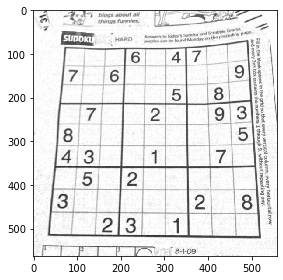

In [2]:
img=io.imread("./../pic/sudoku.png",as_gray=True)
display_img(img)
img.shape

In [4]:
canny_h=np.array([-0.5,0,0.5])
canny_h=canny_h.reshape((1,-1))
canny_v=np.array([[0.5],[0],[-0.5]])

dx=convlution(img,canny_h)
dy=convlution(img,canny_v)

(563, 560)
(565, 558)


In [7]:
window_size=5
k=0.04

ones_=np.ones((window_size,window_size))



dx_square=dx**2
dy_square=dy**2
dx_dy=dx*dy

H,W=img.shape

m=window_size//2

out=np.zeros((H,W))

for i in range(m,H-m):
    for j in range(m,W-m):
        M_xx=np.sum(ones_*dx_square[i-m:i+m+1,j-m:j+m+1])
        M_yy=np.sum(ones_*dy_square[i-m:i+m+1,j-m:j+m+1])
        M_xy=np.sum(ones_*dx_dy[i-m:i+m+1,j-m:j+m+1])

        M=np.array([[M_xx,M_xy],[M_xy,M_yy]])
        
        out[i][j]=np.linalg.det(M)-k*np.trace(M)**2




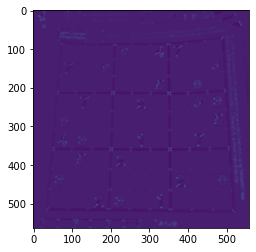

In [8]:
plt.imshow(out)

In [9]:
from skimage.feature import corner_peaks


In [24]:
corners=corner_peaks(out,threshold_rel=0.01)

In [25]:
corners

array([[  2, 555],
       [560, 555],
       [  2,   2],
       ...,
       [306, 406],
       [ 93, 168],
       [126,  74]])

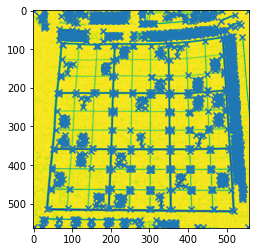

In [26]:
plt.imshow(img)
plt.scatter(corners[:,1],corners[:,0],marker='x')
plt.show()

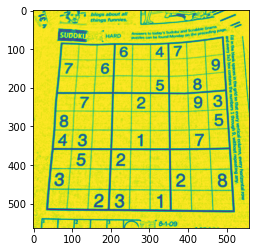

In [16]:
plt.imshow(img)